In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbdreader import DBD, MultiDBD, DBDPatternSelect
import gsw
import seawater
import cmocean


import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

## Import data

In [3]:
data = pd.read_csv("unit_1094_2023-340-4-3_to_2023-340-4-5_[st]bd_wide.csv")
data["date_time"] = pd.to_datetime(data["date_time"])
data = data.set_index("date_time")

narrow_data = pd.read_csv("unit_1094_2023-340-4-3_to_2023-340-4-5_[st]bd_narrow.csv")

In [4]:
data.sort_index()

,c_ballast_pumped,c_battpos,c_climb_bpump,c_de_oil_vol,c_dive_bpump,c_fin,c_pitch,c_wpt_lat,c_wpt_lon,m_altitude,...,m_water_vx,m_water_vy,sci_m_present_secs_into_mission,sci_m_present_time,sci_oxy4_oxygen,sci_seaowl_fdom_scaled,sci_water_cond,sci_water_pressure,sci_water_temp,x_surface_active
date_time,,,,,,,,,,,,,,,,,,,,,
2023-12-07 07:50:11.072000000,420.0,NaN,1000.0,420.0,-1000.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07 07:50:29.267000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07 07:50:41.538000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07 07:50:45.638000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07 07:51:02.000999936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-10 15:03:54.118000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 15:04:06.124999936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 15:04:10.134000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['c_ballast_pumped', 'c_battpos', 'c_climb_bpump', 'c_de_oil_vol',
       'c_dive_bpump', 'c_fin', 'c_pitch', 'c_wpt_lat', 'c_wpt_lon',
       'm_altitude', 'm_argos_is_xmitting', 'm_argos_on', 'm_avg_depth_rate',
       'm_ballast_pumped', 'm_battery', 'm_battpos', 'm_coulomb_amphr_total',
       'm_coulomb_current', 'm_de_oil_vol', 'm_depth',
       'm_digifin_leakdetect_reading', 'm_fin', 'm_gps_lat', 'm_gps_lon',
       'm_heading', 'm_iridium_on', 'm_iridium_status', 'm_lat',
       'm_leakdetect_voltage', 'm_leakdetect_voltage_forward', 'm_lon',
       'm_pitch', 'm_present_secs_into_mission', 'm_present_time',
       'm_raw_altitude', 'm_roll', 'm_vacuum', 'm_veh_temp', 'm_water_depth',
       'm_water_vx', 'm_water_vy', 'sci_m_present_secs_into_mission',
       'sci_m_present_time', 'sci_oxy4_oxygen', 'sci_seaowl_fdom_scaled',
       'sci_water_cond', 'sci_water_pressure', 'sci_water_temp',
       'x_surface_active'],
      dtype='object')

In [6]:
params = ['m_depth', 'm_lat', 'm_lon', 'sci_oxy4_oxygen', 'sci_seaowl_fdom_scaled','sci_water_cond', 'sci_water_pressure', 'sci_water_temp']

## Remove outliers

In [7]:
sci_params = ['sci_oxy4_oxygen', 'sci_seaowl_fdom_scaled','sci_water_cond', 'sci_water_pressure', 'sci_water_temp']

In [8]:
for param in sci_params:
    data.loc[data[param]<0.1, param] = np.nan

## Calculate salinity

cond unit = S/m = (mS*1000)/(cm/100) = mS*10/cm = 10*S/m

In [9]:
data["sci_water_salinity"] = gsw.SP_from_C(C=data["sci_water_cond"]*10, t=data["sci_water_temp"], p=data["sci_water_pressure"])

<Axes: xlabel='date_time'>

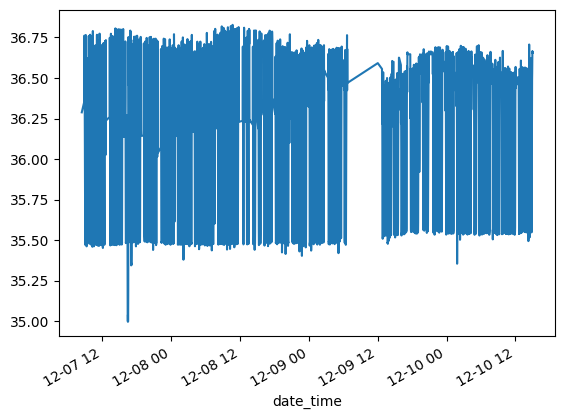

In [10]:
data["sci_water_salinity"].dropna().plot()

## Calculate Density

In [11]:
data["sci_water_density"] = seawater.dens0(data["sci_water_salinity"], data["sci_water_temp"])

## Interpolando

In [13]:
sel_params = ["m_depth", "m_lat", "m_lon", "sci_water_temp","sci_water_salinity", "sci_water_density"]
data_interp = data[sel_params].copy()

In [14]:
for param in sel_params:
    data_interp[f"{param}_interp"] = data_interp[param].interpolate(method="time", limit_direction='both')


In [15]:
data_interp.to_csv("data_interp.csv")

In [40]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px


app = dash.Dash(__name__, suppress_callback_exceptions=True)

app.layout = html.Div(
    children=[
        dcc.Graph(id='map-plot'),
        html.Div([
            html.H6("Parâmetro:", style={'fontSize': 15, 'fontWeight': 'bold', 'color': 'white', 'fontFamily': 'Arial, sans-serif','marginBottom': 10}),  # Customize title
            dcc.Dropdown(
                id='parameter-dropdown',
                options=[
                    {'label': 'Temperatura', 'value': 'sci_water_temp_interp'},
                    {'label': 'Salinidade', 'value': 'sci_water_salinity_interp'}
                ],
                value='sci_water_temp_interp',
                style={'fontSize': 12,'fontFamily': 'Arial, sans-serif', 'color': 'black', 'width': '80%'}

            ),
        
            html.H6("Profundidade (m):", style={'fontSize': 15, 'fontWeight': 'bold', 'color': 'white', 'fontFamily': 'Arial, sans-serif','marginBottom': 10}),  # Customize title

            dcc.Slider(
                id='depth-slider',
                min=data_interp['m_depth_interp'].min(),
                max=data_interp['m_depth_interp'].max(),
                step=1,
                marks=None,
                value=0,
                tooltip={'placement': 'bottom', 'always_visible': True},
            ),
            
            
           
        ],
        style={'position': 'absolute', 'top': '7%', 'left': '8%', 'width': '20%'}
        ),
    ],
    style={'backgroundColor': '#111111', 'color': '#7FDBFF'}
)

@app.callback(
    Output('map-plot', 'figure'),
    [Input('depth-slider', 'value'),
     Input('parameter-dropdown', 'value')]
)
def update_plot(depth, selected_parameter):
    data_sel = data_interp[(data_interp["m_depth_interp"] >= depth - 0.1) & (data_interp["m_depth_interp"] <= depth + 0.2)].copy()

    fig = px.scatter_mapbox(
        data_sel,
        lat="m_lat_interp",
        lon="m_lon_interp",
        color=selected_parameter,
        color_continuous_scale=get_colormap(selected_parameter),
        range_color=[data_interp[selected_parameter].min(), data_interp[selected_parameter].max()],
        size=selected_parameter,
        size_max=10,
        opacity=0.7,
        hover_name=selected_parameter,
        hover_data=["m_depth_interp"],
        mapbox_style="white-bg",
        zoom=8.5,
        center={"lat": -23.0889, "lon": -42.3318}
    )

    fig.update_layout(
        mapbox_layers=[
            {
                "below": 'traces',
                "sourcetype": "raster",
                "sourceattribution": 'Esri World Imagery',
                "source": [
                    'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'
                ]
            }
        ],
        width=1000,
        height=700,
        title=f'Dados Comissão Ressurgência VI',
        coloraxis_colorbar=dict(
            x=0.5,
            y=0,
            len=0.5,
            outlinewidth=1,
            orientation='h',
            tickmode='array',
            tickvals=np.arange(0, 101, get_colorbar_step(selected_parameter)),
            ticktext=list(map(str, np.round(np.arange(0, 101, get_colorbar_step(selected_parameter)),2))),
            tickfont=dict(color='white'),
            thickness=10,
            title=dict(text=get_colorbar_title(selected_parameter), font=dict(color='white', size=12), side='top')
        )
    )

    return fig

def get_colormap(parameter):
    if parameter == 'sci_water_temp_interp':
        return 'thermal'
    elif parameter == 'sci_water_salinity_interp':
        return 'haline'

def get_colorbar_title(parameter):
    if parameter == 'sci_water_temp_interp':
        return 'Temperatura (°C)'
    elif parameter == 'sci_water_salinity_interp':
        return 'Salinidade (psu)'

def get_colorbar_step(parameter):
    if parameter == 'sci_water_temp_interp':
        return 2
    elif parameter == 'sci_water_salinity_interp':
        return 0.2

if __name__ == '__main__':
    app.run_server(debug=True)


